# CSC311 Machine Learning Project 2019 - Group 21 

## LOGISTIC REGRESSION



# Importing train and cv data

```Python modules``` are also imported

In [1]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix, f1_score
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")


data = np.genfromtxt('group21_train.csv')
data2= np.genfromtxt('group21_cv.csv')

# Setting m,n,x,y values 

In [2]:
#Set m and n for train data 
m = data.shape[0]
n = data.shape[1]-1 

#set m and n for cv_data
m_cv =data2.shape[0]
n_cv =data2.shape[1]-1

#Set X and y for train data

X = data[:,0:n]
y = data[:,n].reshape(m,1)

#Set X and y for cv data
X_cv =data2[:,0:n_cv]
y_cv =data2[:,n].reshape(m_cv,1)




# Creating Higher-Order Features

a ```degree``` of 7 will be used

In [3]:
from sklearn.preprocessing import PolynomialFeatures

degree = 7    
polytransform = PolynomialFeatures(degree, include_bias=False).fit(X)
X_train_poly = polytransform.transform(X)
X_cv_poly = polytransform.transform(X_cv)


# Regularizing the value of C 


 The ```graph``` for all the C values along with the f1 score will be plotted



Text(0, 0.5, 'F1 score')

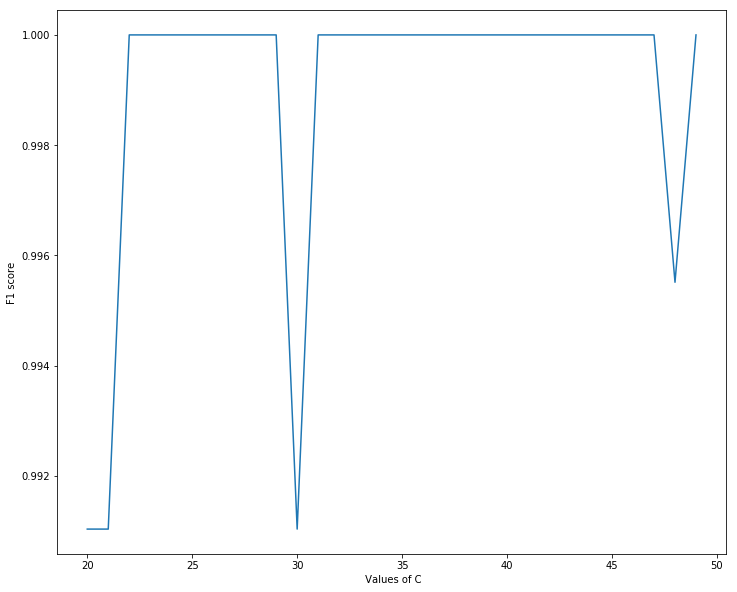

In [4]:
from sklearn.linear_model import LogisticRegression
best_score=0
best_C=0      #this will be the final value of C

#C_array and Score_array will be used for plotting the graph
C_array=[]
Score_array=[]

#Trying out regularization value from 20 to 50

for i in range(20,50):
    

    model= LogisticRegression(random_state=0, solver='lbfgs',C=i)                          
    model.fit(X_train_poly, y.ravel())
    ypred=model.predict(X_cv_poly)  # testing the model using X_cv data
    score=f1_score(y_cv, ypred, average='macro')
    
    C_array.append(i)
    Score_array.append(score)
    
    if score > best_score:
        best_score=score
        best_C=i

#the last four lines of code plots the graph

plt.figure(figsize=(12,10))
plt.plot(C_array ,Score_array) 
plt.xlabel(' Values of C')
plt.ylabel('F1 score')
    

# The final Model

we will use this model to predict on the Cv data

In [5]:
logReg=LogisticRegression(random_state=0, solver='lbfgs',C=best_C)
logReg.fit(X_train_poly, y.ravel())
ypred=logReg.predict(X_cv_poly)  # testing the model using X_cv data

# Model EVALUATION

In [6]:
print(classification_report(y_cv,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       126
         1.0       1.00      1.00      1.00       100

   micro avg       1.00      1.00      1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



In [7]:
%store logReg
%store polytransform

Stored 'logReg' (LogisticRegression)
Stored 'polytransform' (PolynomialFeatures)
